In [1]:
from model import model
from help_funcs import *

In [ ]:
Nin = 50
NE1 = 100
NB = 50
pars = {}
pars['Nin'] = Nin
pars['NE1'] = NE1
pars['NB'] = NB
# resonator parameters
pars['a'] = 0.1
pars['b'] = 0.26
pars['c'] = -60
pars['d'] = -1

Ns = [Nin, NE1, NB]
layerNames = ['in', 'E1', 'B']
numLayers = len(layerNames)
T_R = 50
delta_t = 5
train_frac = 0.5

numseeds = 1
r2_tr_c_allseeds_pre = np.zeros((numseeds,numLayers))
r2_te_c_allseeds_pre = np.zeros((numseeds,numLayers))
r2_tr_r_allseeds_pre = np.zeros((numseeds,numLayers))
r2_te_r_allseeds_pre = np.zeros((numseeds,numLayers))
mi_c_allseeds_pre = np.zeros((numseeds,numLayers))
mi_r_allseeds_pre = np.zeros((numseeds,numLayers))
ent_c_allseeds_pre = np.zeros((numseeds,numLayers))
ent_r_allseeds_pre = np.zeros((numseeds,numLayers))

In [ ]:
for seednum in range(numseeds):
    print(f'seed {seednum}')
    random.seed(seednum)
    np.random.seed(seednum)
    #----- run network simulation -----
    tvec, sos, spikeTimes, spikeIndices = model(pars)
    nt = len(tvec)
    makeRaster(Ns, sos, spikeTimes, spikeIndices, seednum)
    print('\tmade raster')
    tf = tvec[-1]
    dt = tvec[1] - tvec[0]
    #----- decoding analysis -----
    r2_tr_c_all = []
    r2_te_c_all = []
    r2_tr_r_all = []
    r2_te_r_all = []
    mi_c_all = []
    mi_r_all = []
    ent_c_all = []
    ent_r_all = []
    delay = 0
    for li in range(numLayers):
        slideVec = np.arange(0,tf-T_R-delay+dt,dt)
        num_times = len(slideVec)
        stimSub = sos[:num_times]
        tvecSub = tvec[:num_times]
        y = np.array(stimSub)
        
        if seednum == 0:
            if not os.path.exists('dataDir'):
                os.mkdir('dataDir')
            filename = f'dataDir/y_{delay}.txt'
            file = open(filename,'w+')
            np.savetxt(file,y)
            file.close()

        y = np.reshape(y,(len(y),))
        stim = y
        
        layerName = layerNames[li]
        print(layerName)
        N_nrn = Ns[li]
        st = spikeTimes[li]
        si = spikeIndices[li]
        fitMetrics, data = getCorrPlots(st,si,stim,N_nrn,tf,T_R,dt,delta_t,
                                                seednum,delay,layerName)
        r2_tr_c, r2_te_c, r2_tr_r, r2_te_r, mi_c, mi_r = fitMetrics
        y_test, y_pred_count, y_pred_rank = data
        getReconstruction(tvecSub,y_test,y_pred_count,y_pred_rank,layerName,seednum)
        true_ent, count_ent, rank_ent = getStimDist(y_test,y_pred_count,y_pred_rank,layerName,seednum)

        r2_tr_c_all.append(r2_tr_c)
        r2_te_c_all.append(r2_te_c)
        r2_tr_r_all.append(r2_tr_r)
        r2_te_r_all.append(r2_te_r)
        mi_c_all.append(mi_c)
        mi_r_all.append(mi_r)
        ent_c_all.append(count_ent)
        ent_r_all.append(rank_ent)
        delay += 20
        
    r2_tr_c_allseeds_pre[seednum,:] = np.array(r2_tr_c_all)
    r2_te_c_allseeds_pre[seednum,:] = np.array(r2_te_c_all)
    r2_tr_r_allseeds_pre[seednum,:] = np.array(r2_tr_r_all)
    r2_te_r_allseeds_pre[seednum,:] = np.array(r2_te_r_all)
    mi_c_allseeds_pre[seednum,:] = np.array(mi_c_all)
    mi_r_allseeds_pre[seednum,:] = np.array(mi_r_all)
    ent_c_allseeds_pre[seednum,:] = np.array(ent_c_all)
    ent_r_allseeds_pre[seednum,:] = np.array(ent_r_all)
        
    print(f'finished decoding all layers for seed {seednum}\n')

In [5]:
Nin = 50
# NE1 = 100
NB = 50
pars = {}
pars['Nin'] = Nin
# pars['NE1'] = NE1
pars['NB'] = NB
# resonator parameters
pars['a'] = 0.1
pars['b'] = 0.26
pars['c'] = -60
pars['d'] = -1

layerNames = ['in', 'E1', 'B']
numLayers = len(layerNames)
T_R = 50
delta_t = 5
train_frac = 0.5

NE1vec = [100,200,300]
numE1 = len(NE1vec)

# r2_tr_c_in = np.zeros(numE1)
# r2_te_c_in = np.zeros(numE1)
# r2_tr_r_in = np.zeros(numE1)
# r2_te_r_in = np.zeros(numE1)
# r2_tr_c_B  = np.zeros(numE1)
# r2_te_c_B  = np.zeros(numE1)
# r2_tr_r_B  = np.zeros(numE1)
# r2_te_r_B  = np.zeros(numE1)
# mi_c_in = np.zeros(numE1)
# mi_r_in = np.zeros(numE1)
# mi_c_B  = np.zeros(numE1)
# mi_r_B  = np.zeros(numE1)
# ent_c_in = np.zeros(numE1)
# ent_r_in = np.zeros(numE1)
# ent_c_B = np.zeros(numE1)
# ent_r_B = np.zeros(numE1)
r2_tr_c_in = []
r2_te_c_in = []
r2_tr_r_in = []
r2_te_r_in = []
r2_tr_c_B  = []
r2_te_c_B  = []
r2_tr_r_B  = []
r2_te_r_B  = []
mi_c_in = []
mi_r_in = []
mi_c_B  = []
mi_r_B  = []
ent_c_in = []
ent_r_in = []
ent_c_B = []
ent_r_B = []

for E1i in range(numE1):
    NE1 = NE1vec[E1i]
    pars['NE1'] = NE1
    print(f'NE1 = {NE1}')
    Ns = [Nin, NE1, NB]
    random.seed(0)
    np.random.seed(0)
    #----- run network simulation -----
    tvec, sos, spikeTimes, spikeIndices = model(pars)
    nt = len(tvec)
    makeRaster(Ns, sos, spikeTimes, spikeIndices, E1i)
    print('\tmade raster')
    tf = tvec[-1]
    dt = tvec[1] - tvec[0]
    #----- decoding analysis -----
    delay = 0
    for li in range(numLayers):
        if li != 1:
            slideVec = np.arange(0,tf-T_R-delay+dt,dt)
            num_times = len(slideVec)
            stimSub = sos[:num_times]
            tvecSub = tvec[:num_times]
            y = np.array(stimSub)
            y = np.reshape(y,(len(y),))
            stim = y

            layerName = layerNames[li]
            print(layerName)
            N_nrn = Ns[li]
            st = spikeTimes[li]
            si = spikeIndices[li]
            fitMetrics, data = getCorrPlots(st,si,stim,N_nrn,tf,T_R,dt,delta_t,
                                                    E1i,delay,layerName)
            r2_tr_c, r2_te_c, r2_tr_r, r2_te_r, mi_c, mi_r = fitMetrics
            y_test, y_pred_count, y_pred_rank = data
            getReconstruction(tvecSub,y_test,y_pred_count,y_pred_rank,layerName,E1i)
            true_ent, count_ent, rank_ent = getStimDist(y_test,y_pred_count,y_pred_rank,layerName,E1i)
            delay += 40
        if li == 0: #input layer
            r2_tr_c_in.append(r2_tr_c)
            r2_te_c_in.append(r2_te_c)
            r2_tr_r_in.append(r2_tr_r)
            r2_te_r_in.append(r2_te_r)
            mi_c_in.append(mi_c)
            mi_r_in.append(mi_r)
            ent_c_in.append(count_ent)
            ent_r_in.append(rank_ent)
        if li == 2: #bottleneck layer
            r2_tr_c_B.append(r2_tr_c)
            r2_te_c_B.append(r2_te_c)
            r2_tr_r_B.append(r2_tr_r)
            r2_te_r_B.append(r2_te_r)
            mi_c_B.append(mi_c)
            mi_r_B.append(mi_r)
            ent_c_B.append(count_ent)
            ent_r_B.append(rank_ent)
    print(f'finished decoding all layers for NE1 = {NE1}\n')
            
# r2_tr_c_in = np.array(r2_tr_c_in)
# r2_te_c_in = np.array(r2_te_c_in)
# r2_tr_r_in = np.array(numE1)
# r2_te_r_in = np.zeros(numE1)
# r2_tr_c_B  = np.zeros(numE1)
# r2_te_c_B  = np.zeros(numE1)
# r2_tr_r_B  = np.zeros(numE1)
# r2_te_r_B  = np.zeros(numE1)
# mi_c_in = np.zeros(numE1)
# mi_r_in = np.zeros(numE1)
# mi_c_B  = np.zeros(numE1)
# mi_r_B  = np.zeros(numE1)
# ent_c_in = np.zeros(numE1)
# ent_r_in = np.zeros(numE1)
# ent_c_B = np.zeros(numE1)
# ent_r_B = np.zeros(numE1)
        
    

NE1 = 100
	sim done
	made raster
in
	getting count and rankvecs...
	count optimization ...
	rank optimization
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 100

NE1 = 200
	sim done
	made raster
in
	getting count and rankvecs...
	count optimization ...
	rank optimization
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 200

NE1 = 300
	sim done
	made raster
in
	getting count and rankvecs...
	count optimization ...
	rank optimization
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 300



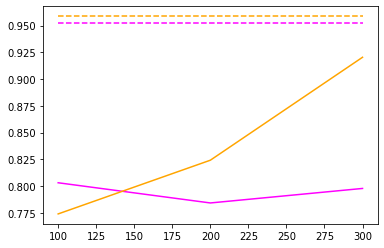

In [10]:
# print(r2_te_c_in)
# print(r2_te_r_in)
in_c = r2_te_c_in[0]
in_r = r2_te_r_in[0]
plt.plot(NE1vec,in_c*np.ones(len(NE1vec)),linestyle='--',color='magenta')
plt.plot(NE1vec,in_r*np.ones(len(NE1vec)),linestyle='--',color='orange')
plt.plot(NE1vec,r2_te_c_B,color='magenta')
plt.plot(NE1vec,r2_te_r_B,color='orange')


In [8]:
with open('in_c.npy', 'wb') as f:
    np.save(f, in_c)
with open('in_r.npy', 'wb') as f:
    np.save(f, in_r)

In [9]:
in_c = np.load('in_c.npy')
in_r = np.load('in_r.npy')

In [11]:
Nin = 50
# NE1 = 100
NB = 50
pars = {}
pars['Nin'] = Nin
# pars['NE1'] = NE1
pars['NB'] = NB
# resonator parameters
pars['a'] = 0.1
pars['b'] = 0.26
pars['c'] = -60
pars['d'] = -1

layerNames = ['in', 'E1', 'B']
numLayers = len(layerNames)
T_R = 50
delta_t = 5
train_frac = 0.5

NE1vec = [100,200,300,400,500,600,700,800,900,1000]
numE1 = len(NE1vec)

r2_tr_c_B  = []
r2_te_c_B  = []
r2_tr_r_B  = []
r2_te_r_B  = []
mi_c_B  = []
mi_r_B  = []
ent_c_B = []
ent_r_B = []

for E1i in range(numE1):
    NE1 = NE1vec[E1i]
    pars['NE1'] = NE1
    print(f'NE1 = {NE1}')
    Ns = [Nin, NE1, NB]
    random.seed(0)
    np.random.seed(0)
    #----- run network simulation -----
    tvec, sos, spikeTimes, spikeIndices = model(pars)
    nt = len(tvec)
    makeRaster(Ns, sos, spikeTimes, spikeIndices, E1i)
    print('\tmade raster')
    tf = tvec[-1]
    dt = tvec[1] - tvec[0]
    #----- decoding analysis -----
    delay = 40
    li = 2
#     for li in range(numLayers):
#         if li == 2:
    slideVec = np.arange(0,tf-T_R-delay+dt,dt)
    num_times = len(slideVec)
    stimSub = sos[:num_times]
    tvecSub = tvec[:num_times]
    y = np.array(stimSub)
    y = np.reshape(y,(len(y),))
    stim = y

    layerName = layerNames[li]
    print(layerName)
    N_nrn = Ns[li]
    st = spikeTimes[li]
    si = spikeIndices[li]
    fitMetrics, data = getCorrPlots(st,si,stim,N_nrn,tf,T_R,dt,delta_t,
                                            E1i,delay,layerName)
    r2_tr_c, r2_te_c, r2_tr_r, r2_te_r, mi_c, mi_r = fitMetrics
    y_test, y_pred_count, y_pred_rank = data
    getReconstruction(tvecSub,y_test,y_pred_count,y_pred_rank,layerName,E1i)
    true_ent, count_ent, rank_ent = getStimDist(y_test,y_pred_count,y_pred_rank,layerName,E1i)

    r2_tr_c_B.append(r2_tr_c)
    r2_te_c_B.append(r2_te_c)
    r2_tr_r_B.append(r2_tr_r)
    r2_te_r_B.append(r2_te_r)
    mi_c_B.append(mi_c)
    mi_r_B.append(mi_r)
    ent_c_B.append(count_ent)
    ent_r_B.append(rank_ent)
    print(f'finished decoding all layers for NE1 = {NE1}\n')
        
    

NE1 = 100
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 100

NE1 = 200
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 200

NE1 = 300
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 300

NE1 = 400
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 400

NE1 = 500
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 500

NE1 = 600
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 600

NE1 = 700
	sim done
	made raster
B
	getting count and rankvecs...
	count optimizat

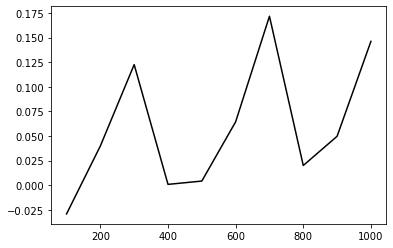

In [14]:
# print(r2_te_c_in)
# print(r2_te_r_in)
# in_c = r2_te_c_in[0]
# in_r = r2_te_r_in[0]
# plt.plot(NE1vec,in_c*np.ones(len(NE1vec)),linestyle='--',color='magenta')
# plt.plot(NE1vec,in_r*np.ones(len(NE1vec)),linestyle='--',color='orange')
# plt.plot(NE1vec,r2_te_c_B,color='magenta')
diff = np.array(r2_te_r_B) - np.array(r2_te_c_B)
plt.plot(NE1vec,diff,color='black')


In [15]:
Nin = 50
# NE1 = 100
NB = 50
pars = {}
pars['Nin'] = Nin
# pars['NE1'] = NE1
pars['NB'] = NB
# resonator parameters
pars['a'] = 0.1
pars['b'] = 0.26
pars['c'] = -60
pars['d'] = -1

layerNames = ['in', 'E1', 'B']
numLayers = len(layerNames)
T_R = 50
delta_t = 5
train_frac = 0.5

NE1vec = [1000,2000,3000,4000,5000]
numE1 = len(NE1vec)

r2_tr_c_B  = []
r2_te_c_B  = []
r2_tr_r_B  = []
r2_te_r_B  = []
mi_c_B  = []
mi_r_B  = []
ent_c_B = []
ent_r_B = []

for E1i in range(numE1):
    NE1 = NE1vec[E1i]
    pars['NE1'] = NE1
    print(f'NE1 = {NE1}')
    Ns = [Nin, NE1, NB]
    random.seed(0)
    np.random.seed(0)
    #----- run network simulation -----
    tvec, sos, spikeTimes, spikeIndices = model(pars)
    nt = len(tvec)
    makeRaster(Ns, sos, spikeTimes, spikeIndices, E1i)
    print('\tmade raster')
    tf = tvec[-1]
    dt = tvec[1] - tvec[0]
    #----- decoding analysis -----
    delay = 40
    li = 2
#     for li in range(numLayers):
#         if li == 2:
    slideVec = np.arange(0,tf-T_R-delay+dt,dt)
    num_times = len(slideVec)
    stimSub = sos[:num_times]
    tvecSub = tvec[:num_times]
    y = np.array(stimSub)
    y = np.reshape(y,(len(y),))
    stim = y

    layerName = layerNames[li]
    print(layerName)
    N_nrn = Ns[li]
    st = spikeTimes[li]
    si = spikeIndices[li]
    fitMetrics, data = getCorrPlots(st,si,stim,N_nrn,tf,T_R,dt,delta_t,
                                            E1i,delay,layerName)
    r2_tr_c, r2_te_c, r2_tr_r, r2_te_r, mi_c, mi_r = fitMetrics
    y_test, y_pred_count, y_pred_rank = data
    getReconstruction(tvecSub,y_test,y_pred_count,y_pred_rank,layerName,E1i)
    true_ent, count_ent, rank_ent = getStimDist(y_test,y_pred_count,y_pred_rank,layerName,E1i)

    r2_tr_c_B.append(r2_tr_c)
    r2_te_c_B.append(r2_te_c)
    r2_tr_r_B.append(r2_tr_r)
    r2_te_r_B.append(r2_te_r)
    mi_c_B.append(mi_c)
    mi_r_B.append(mi_r)
    ent_c_B.append(count_ent)
    ent_r_B.append(rank_ent)
    print(f'finished decoding all layers for NE1 = {NE1}\n')
        
    

NE1 = 1000
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 1000

NE1 = 2000
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 2000

NE1 = 3000
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 3000

NE1 = 4000
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 4000

NE1 = 5000
	sim done
	made raster
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 5000



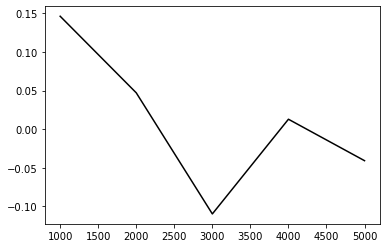

In [16]:
diff = np.array(r2_te_r_B) - np.array(r2_te_c_B)
plt.plot(NE1vec,diff,color='black')

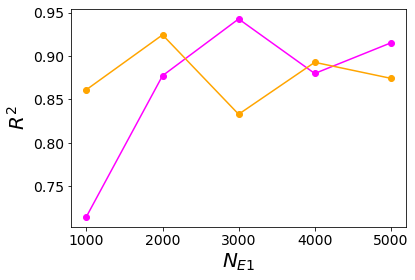

In [25]:
# plt.plot(NE1vec,in_c*np.ones(len(NE1vec)),linestyle='--',color='magenta')
# plt.plot(NE1vec,in_r*np.ones(len(NE1vec)),linestyle='--',color='orange')
plt.plot(NE1vec,r2_te_c_B,color='magenta',marker='o')
plt.plot(NE1vec,r2_te_r_B,color='orange',marker='o')
plt.xlabel('$N_{E1}$',fontsize=20)
plt.xticks(NE1vec,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('$R^2$',fontsize=20)
plt.savefig('R2_v_NE1_1seed.png',bbox_inches='tight',dpi=200)
plt.show()

In [27]:
Nin = 50
NB = 50
pars = {}
pars['Nin'] = Nin
pars['NB'] = NB
# resonator parameters
pars['a'] = 0.1
pars['b'] = 0.26
pars['c'] = -60
pars['d'] = -1

Ns = [Nin, NE1, NB]
layerNames = ['in', 'E1', 'B']
numLayers = len(layerNames)
T_R = 50
delta_t = 5
train_frac = 0.5

numseeds = 1
r2_tr_c_allseeds = np.zeros((numseeds,numE1))
r2_te_c_allseeds = np.zeros((numseeds,numE1))
r2_tr_r_allseeds = np.zeros((numseeds,numE1))
r2_te_r_allseeds = np.zeros((numseeds,numE1))
mi_c_allseeds = np.zeros((numseeds,numE1))
mi_r_allseeds = np.zeros((numseeds,numE1))
ent_c_allseeds = np.zeros((numseeds,numE1))
ent_r_allseeds = np.zeros((numseeds,numE1))

for seednum in range(numseeds):
    print(f'seed {seednum}')
    random.seed(seednum)
    np.random.seed(seednum)
    #----- decoding analysis -----
    r2_tr_c_B  = []
    r2_te_c_B  = []
    r2_tr_r_B  = []
    r2_te_r_B  = []
    mi_c_B  = []
    mi_r_B  = []
    ent_c_B = []
    ent_r_B = []
    delay = 40
    li = 2
    for E1i in range(numE1):
        NE1 = NE1vec[E1i]
        pars['NE1'] = NE1
        print(f'NE1 = {NE1}')
        #----- run network simulation -----
        tvec, sos, spikeTimes, spikeIndices = model(pars)
        #----- decoding analysis -----
        slideVec = np.arange(0,tf-T_R-delay+dt,dt)
        num_times = len(slideVec)
        stimSub = sos[:num_times]
        tvecSub = tvec[:num_times]
        y = np.array(stimSub)
        y = np.reshape(y,(len(y),))
        stim = y

        layerName = layerNames[li]
#         print(layerName)
        N_nrn = Ns[li]
        st = spikeTimes[li]
        si = spikeIndices[li]
        fitMetrics, data = getCorrPlots(st,si,stim,N_nrn,tf,T_R,dt,delta_t,
                                                E1i,delay,layerName)
        r2_tr_c, r2_te_c, r2_tr_r, r2_te_r, mi_c, mi_r = fitMetrics
        y_test, y_pred_count, y_pred_rank = data
        getReconstruction(tvecSub,y_test,y_pred_count,y_pred_rank,layerName,E1i)
        true_ent, count_ent, rank_ent = getStimDist(y_test,y_pred_count,y_pred_rank,layerName,E1i)

        r2_tr_c_B.append(r2_tr_c)
        r2_te_c_B.append(r2_te_c)
        r2_tr_r_B.append(r2_tr_r)
        r2_te_r_B.append(r2_te_r)
        mi_c_B.append(mi_c)
        mi_r_B.append(mi_r)
        ent_c_B.append(count_ent)
        ent_r_B.append(rank_ent)
        
    r2_tr_c_allseeds[seednum,:] = np.array(r2_tr_c_B)
    r2_te_c_allseeds[seednum,:] = np.array(r2_te_c_B)
    r2_tr_r_allseeds[seednum,:] = np.array(r2_tr_r_B)
    r2_te_r_allseeds[seednum,:] = np.array(r2_te_r_B)
    mi_c_allseeds[seednum,:] = np.array(mi_c_B)
    mi_r_allseeds[seednum,:] = np.array(mi_r_B)
    ent_c_allseeds[seednum,:] = np.array(ent_c_B)
    ent_r_allseeds[seednum,:] = np.array(ent_r_B)
        
    print(f'finished decoding all layers for seed {seednum}\n')

seed 0
NE1 = 1000
	sim done
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 1000

NE1 = 2000
	sim done
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 2000

NE1 = 3000
	sim done
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 3000

NE1 = 4000
	sim done
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 4000

NE1 = 5000
	sim done
B
	getting count and rankvecs...
	count optimization ...
	rank optimization
finished decoding all layers for NE1 = 5000

finished decoding all layers for seed 0



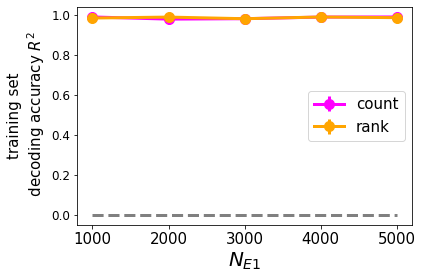

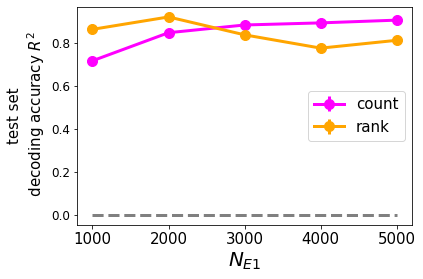

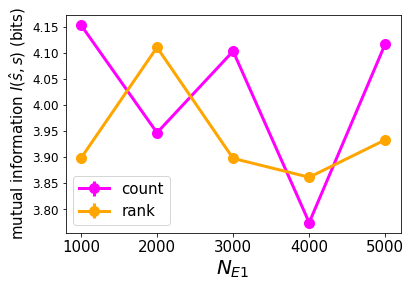

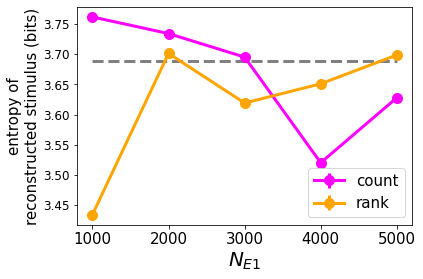

In [32]:
countR2s_mean_tr = np.mean(r2_tr_c_allseeds,axis=0)
countR2s_sd_tr = np.std(r2_tr_c_allseeds,axis=0)
rankR2s_mean_tr = np.mean(r2_tr_r_allseeds,axis=0)
rankR2s_sd_tr = np.std(r2_tr_r_allseeds,axis=0)
plt.errorbar(NE1vec,countR2s_mean_tr,countR2s_sd_tr,label='count',marker='o',linewidth=3,markersize=10,color='magenta')
plt.errorbar(NE1vec,rankR2s_mean_tr,rankR2s_sd_tr,label='rank',marker='o',linewidth=3,markersize=10,color='orange')
plt.plot(NE1vec,np.zeros(numE1),color='gray',linestyle='--',linewidth=3)
plt.xticks(NE1vec,fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel('training set\n decoding accuracy $R^2$',fontsize=15)
plt.xlabel('$N_{E1}$',fontsize=20)
plt.legend(fontsize=15)
# plt.savefig('trainR2_v_layer_10seeds.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

countR2s_mean_te = np.mean(r2_te_c_allseeds,axis=0)
countR2s_sd_te = np.std(r2_te_c_allseeds,axis=0)
rankR2s_mean_te = np.mean(r2_te_r_allseeds,axis=0)
rankR2s_sd_te = np.std(r2_te_r_allseeds,axis=0)
plt.errorbar(NE1vec,countR2s_mean_te,countR2s_sd_te,label='count',marker='o',linewidth=3,markersize=10,color='magenta')
plt.errorbar(NE1vec,rankR2s_mean_te,rankR2s_sd_te,label='rank',marker='o',linewidth=3,markersize=10,color='orange')
plt.plot(NE1vec,np.zeros(numE1),color='gray',linestyle='--',linewidth=3)
plt.xticks(NE1vec,fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel('test set\n decoding accuracy $R^2$',fontsize=15)
plt.xlabel('$N_{E1}$',fontsize=20)
plt.legend(fontsize=15)
# plt.savefig('testR2_v_layer_10seeds.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

mi_c_mean = np.mean(mi_c_allseeds,axis=0)
mi_c_sd = np.std(mi_c_allseeds,axis=0)
mi_r_mean = np.mean(mi_r_allseeds,axis=0)
mi_r_sd = np.std(mi_r_allseeds,axis=0)
plt.errorbar(NE1vec, mi_c_mean, mi_c_sd, label='count', marker='o', linewidth=3, markersize=10, color='magenta')
plt.errorbar(NE1vec, mi_r_mean, mi_r_sd, label='rank', marker='o', linewidth=3, markersize=10, color='orange')
# # plt.plot(layerVec,true_ent*np.ones(numLayers),color='gray',linestyle='--',linewidth=3)
plt.xticks(NE1vec,fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel(r'mutual information $I(\hat{s},s)$ (bits)',fontsize=15)
plt.xlabel('$N_{E1}$',fontsize=20)
plt.legend(fontsize=15)
# plt.savefig('mi_v_layer_10seeds.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()

ent_c_mean = np.mean(ent_c_allseeds,axis=0)
ent_c_sd = np.std(ent_c_allseeds,axis=0)
ent_r_mean = np.mean(ent_r_allseeds,axis=0)
ent_r_sd = np.std(ent_r_allseeds,axis=0)
layerLabels = ['in','E1','B','E2','out']
plt.errorbar(NE1vec, ent_c_mean, ent_c_sd, label='count', marker='o', linewidth=3, markersize=10, color='magenta')
plt.errorbar(NE1vec, ent_r_mean, ent_r_sd, label='rank', marker='o', linewidth=3, markersize=10, color='orange')
plt.plot(NE1vec,true_ent*np.ones(numE1),color='gray',linestyle='--',linewidth=3)
plt.xticks(NE1vec,fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel('entropy of\nreconstructed stimulus (bits)',fontsize=15)
plt.xlabel('$N_{E1}$',fontsize=20)
plt.legend(fontsize=15)
# plt.savefig('ent_v_layer_10seeds.png',bbox_inches='tight',dpi=200)
plt.show()
plt.close()